In [1]:
# importing libraries for data preprocessing
import pandas as pd

# import libraries for plotting
import cufflinks as cf
import plotly.offline
from  plotly.offline import plot_mpl
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# importing arima model
from pyramid.arima import auto_arima

# import libraries for error metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



In [2]:
# data preprocessing
# reading dataset
data = pd.read_csv("time_series_30min_singleindex.csv")

data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'])
data['utc_timestamp'] = data['utc_timestamp'].dt.date

In [3]:
# making column datetime
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'])

data = data.drop_duplicates(subset='utc_timestamp', keep='first')

# setting inddex
data.set_index('utc_timestamp', inplace=True)
data.head()

,cet_cest_timestamp,CY_load_actual_entsoe_transparency,CY_load_forecast_entsoe_transparency,CY_wind_onshore_generation_actual,FR_load_actual_tso,FR_load_forecast_tso,FR_solar_generation_actual,FR_wind_onshore_generation_actual,GB_EAW_load_actual_tso,GB_GBN_load_actual_entsoe_transparency,...,GB_UKM_wind_onshore_capacity,GB_UKM_wind_onshore_generation_actual,GB_UKM_wind_onshore_profile,IE_load_actual_entsoe_transparency,IE_load_forecast_entsoe_transparency,IE_wind_onshore_generation_actual,IE_sem_load_actual_entsoe_transparency,IE_sem_load_forecast_entsoe_transparency,IE_sem_price_day_ahead,IE_sem_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2005-03-31,2005-04-01 01:30:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28871.0,NaN,...,1371.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-01,2005-04-01 02:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30340.0,NaN,...,1371.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-02,2005-04-02 02:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28910.0,NaN,...,1371.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-03,2005-04-03 02:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27491.0,NaN,...,1371.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-04,2005-04-04 02:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27054.0,NaN,...,1371.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# remvoing unwanted data
data = data['GB_EAW_load_actual_tso']
data = data[: int((len(data)*75)/100) ]
data = data[data.index.day == 1]
data = data.astype('float64')
data.head()

utc_timestamp
2005-04-01    30340.0
2005-05-01    25607.0
2005-06-01    24709.0
2005-07-01    24497.0
2005-08-01    22478.0
Name: GB_EAW_load_actual_tso, dtype: float64

In [5]:
# chainging column name
data.columns = ['Energy Production']

data.head()

utc_timestamp
2005-04-01    30340.0
2005-05-01    25607.0
2005-06-01    24709.0
2005-07-01    24497.0
2005-08-01    22478.0
Name: GB_EAW_load_actual_tso, dtype: float64

In [6]:
#create train/test datasets
train = data[:int((70*len(data)/100))]
valid = data[int((70*len(data)/100)):]

In [7]:
#plotting the data 

data.iplot(title="power")

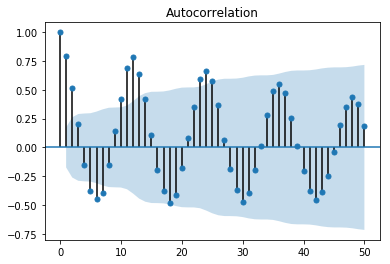

In [8]:
# plotting auto correllation function values
plot_acf(data, lags=50)
pyplot.show()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt



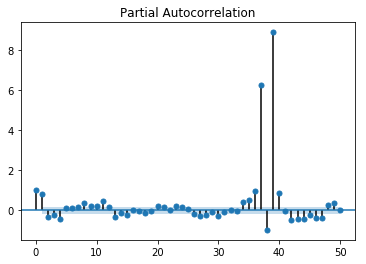

In [9]:
# plotting partial auto correlation function values
plot_pacf(data, lags=50)
pyplot.show()

In [10]:
#train the arima model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, m=12)
model.fit(train)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=1727.895, BIC=1732.850, Fit time=0.016 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=1615.007, BIC=1624.917, Fit time=0.449 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=1624.628, BIC=1634.538, Fit time=0.808 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=1650.241, BIC=1657.673, Fit time=0.056 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 12); AIC=1599.722, BIC=1612.109, Fit time=4.185 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 12); AIC=1615.104, BIC=1629.968, Fit time=3.592 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 0, 0, 12); AIC=1726.365, BIC=1736.275, Fit time=1.228 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 0, 0, 12); AIC=1617.874, BIC=1632.738, Fit time=1.940 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_orde

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 0, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 0, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [11]:
# make predictions 
future_forecast = model.predict(n_periods=len(valid))
train_forecast = model.predict(n_periods=len(train))

future_forecast


array([21463.83210585, 23409.53723257, 23645.13722055, 25983.95240587,
       26681.66026764, 26701.50100918, 29981.29673647, 27541.90286554,
       24914.73746611, 26112.82425366, 24251.20149589, 22869.81345944,
       23813.84722057, 25062.86657277, 25232.56363796, 26570.00890964,
       26798.13597491, 26867.30371335, 28752.28983379, 27363.06437841,
       25976.13700791, 26801.06127742, 25660.19584743, 24868.37924941,
       25465.8665048 , 26150.47536487, 26247.6080366 , 26944.10307967,
       27020.10256807, 27070.60774484, 28054.60877463, 27332.58521031,
       26639.23315233, 27103.84689559, 26490.60945936, 26077.78954376,
       26403.38062973, 26752.47610739, 26803.08243954])

In [12]:
# create a comparison dataframe
future_forecast = pd.DataFrame(future_forecast,index = valid.index,columns=['Prediction'])
train_forecast = pd.DataFrame(train_forecast,index = train.index,columns=['Prediction'])
pd.concat([valid,future_forecast],axis=1).iplot(title="Prediction",xTitle='TIme Stamp',yTitle='Demand')

In [13]:
# plotting whole dataset with predictions
pd.concat([data,future_forecast],axis=1).iplot()

In [14]:
#  printing r2 score of our model 
rms = sqrt(mean_squared_error(valid,future_forecast))
print(rms)

3710.969722391223


In [15]:
#  printing mean square error of our model 
r2 = r2_score(valid,future_forecast)
r2

-0.21262147092185635